In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
REPLICATION = True

file_path_add = ''
if REPLICATION:
    file_path_add = 'replication/'

In [3]:
datanames = [('wvs_w7', 'wvs'),('pew', 'pew')]

In [4]:
lms = ['mcm', 'gpt2_token_pairs', 'gpt2-medium_token_pairs','gpt2-large_token_pairs', 'gpt3', 'gpt3_token_pairs']
lms = ['mcm', 'gpt2_token_pairs_in', 'gpt2-medium_token_pairs_in','gpt2-large_token_pairs_in']

In [5]:
lms_names = ['SBERT', 'GPT2', 'GPT2-MEDIUM','GPT2-LARGE','GPT3-QA','GPT3-PROBS']
lms_names = ['SBERT', 'GPT2', 'GPT2-MEDIUM','GPT2-LARGE']

In [6]:
lm_scores = ['mcm_score','log prob difference','log prob difference','log prob difference', 'gpt3_score_mean','log prob difference']

In [7]:
main_models = ['mcm','gpt2-large_token_pairs','gpt3_token_pairs']
appendix_models = ['gpt2_token_pairs','gpt2-medium_token_pairs','gpt3']

main_models = ['mcm','gpt2-large_token_pairs_in']
appendix_models = ['gpt2_token_pairs_in','gpt2-medium_token_pairs_in']

## Main models

In [8]:
def draw_figure(models, prefix):
    fig,axes = plt.subplots(2, len(models), figsize = (4 * len(models), 4), sharey = False, sharex = True)
#     fig.tight_layout()
    plt.subplots_adjust(hspace=0.8)
    for i in range(len(models)):
        for data_index in range(2):
            legend = False
            
            
            lm_index = lms.index(models[i])
            
            lm = lms[lm_index]
            score = lm_scores[lm_index]
            data_name = datanames[data_index]

            emp_column = f'{data_name[1]}_score'
            lm_column = score




            ax = axes[data_index][i]
            data = pd.read_csv(f'../data/{file_path_add}{data_name[0]}_{lm}.csv')
            data = data.loc[(~pd.isna(data[emp_column])) & (data.country !='universal')]


            print(models[i],data[lm_column].min() )
            
            
            r, p = scipy.stats.pearsonr(data[emp_column], data[lm_column])
            max_value = max([abs(x) for x in data[lm_column]])
            data[lm_column] = [x / max_value for x in data[lm_column]]
            g = sns.regplot(data= data, x = emp_column, y = lm_column, color = 'black', ax = ax)


            topic_col = 'topic' if 'topic' in data.columns else 'question'


            g = sns.scatterplot(data= data, x = emp_column, 
                                y = lm_column, hue = topic_col, 
                                legend = legend, ax = ax,
                               )
            
            

            
            if p < 0.001:
                
                p = r'$^{***}$'
            elif p < 0.01:
                p = r'$^{**}$'
            elif p < 0.05:
                p = r'$^{*}$'
            else:
                p = ''
     

            
            g.set_title(f'{lms_names[lm_index]} (r = {round(r, 3)}' + p + ')')


            y_label = 'Model moral score' if i == 0 else ''
            x_label = 'Human rating' if data_index == 1 else '' 
            ax.set_ylabel(y_label)
            ax.set_xlabel(x_label)

            sns.despine(fig=None, ax=None,left=False, bottom=False, offset=None, trim=False)
    plt.savefig(f'figs/figure_2_{prefix}.png', bbox_inches = 'tight', dpi = 100)
    plt.show()

mcm -1.2008342742919922
mcm -0.9039040207862854
gpt2-large_token_pairs_in -3.874598
gpt2-large_token_pairs_in -1.6572104


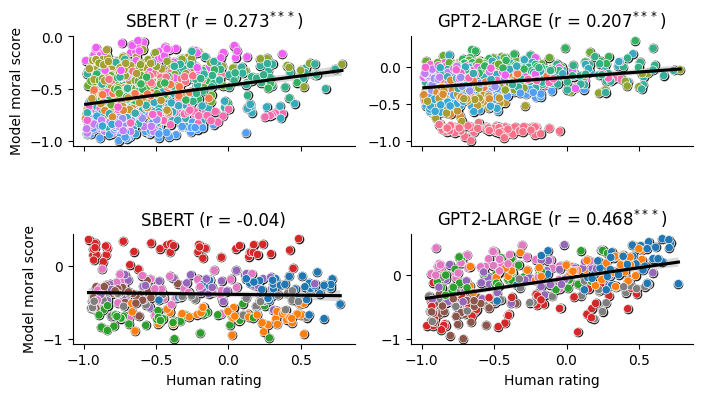

In [9]:
draw_figure(main_models,'main')

gpt2_token_pairs_in -3.2507553
gpt2_token_pairs_in -1.6818243
gpt2-medium_token_pairs_in -3.7018623
gpt2-medium_token_pairs_in -2.3490806


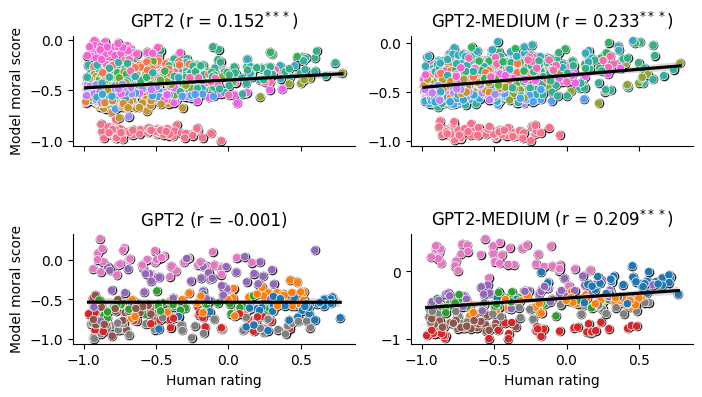

In [10]:
draw_figure(appendix_models,'app')